[(7, 7), (7, 6), (6, 6), (6, 5), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (0, 1), (0, 0)]
--- 25.164555549621582 seconds ---


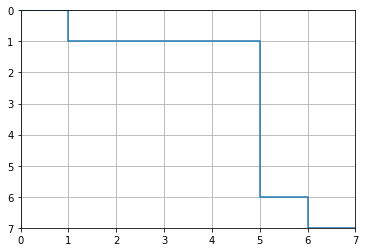

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

class Node():

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def dijk(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f and g values
            child.g = current_node.g + 1
            child.f = child.g

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


def main():

    maze = [[0,0,1,1,1,1,1,1],
            [1,0,0,0,0,0,0,0],
            [1,1,1,1,1,0,1,0],
            [1,1,0,1,1,0,1,0],
            [0,0,0,0,0,0,1,1],
            [1,0,1,1,1,0,1,1],
            [1,0,0,0,1,0,0,1],
            [1,1,1,1,1,1,0,0]]

    start = (7, 7)
    end = (0, 0)
    start_time = time.time()
    path = dijk(maze, start, end)
    print(path)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    x, y = zip(*path)
    plt.plot(y, x)
    plt.axis([0, 7, 7, 0])
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    main()